In [1]:
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb

In [2]:
repos

['jenkinsci/jenkins']

In [3]:
import_query = JA_LANGUAGE.query("(import_declaration (scoped_identifier) @decl )")
def import_node_to_list(node):
    if node.type == "scoped_identifier":
        list = import_node_to_list

updating jenkinsci/jenkins...
Done!
WeightGraph statistics: 1298 nodes, 4646 edges, 3 connected component(s), with sizes: [1292, 4, 2]


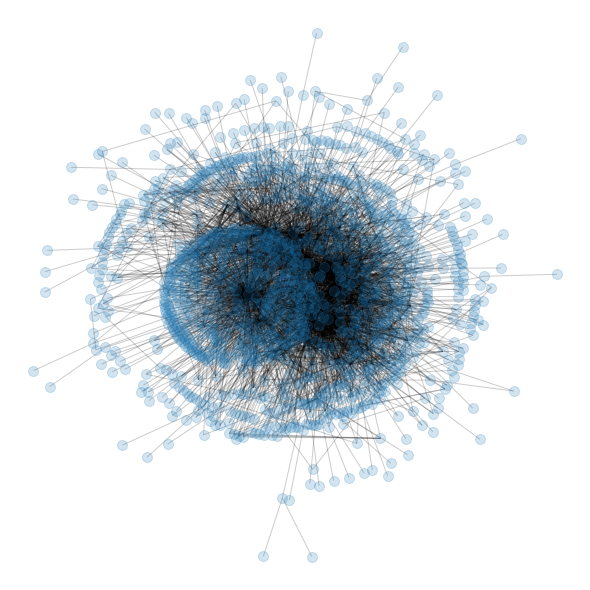

Everything up to date!


In [4]:
for repo in repos:
    r = LocalRepo(repo)
    r.update()
    
    structural = calculate_structural_connections(r)
    continue
    
    found_nodes = RepoTree("")
    files = r.get_file_objects()
    print("Analyzing " + str(len(files)) + " files...")
    for file_obj in files:
        file = RepoFile(r, file_obj)
        imports = import_query.captures(file.get_tree().root_node)
        for import_statement in imports:
            print(file.node_text(import_statement[0]).split("."))
        print("-")
        def handle(logic_path, node):
            found_nodes.register(logic_path)
        file.walk_tree(handle)
    
    print("Found " + str(found_nodes.node_count()) + " classes, methods and fields!")
    
    with open("../debug-tree.json", "w") as outfile:
        outfile.write(found_nodes.to_json())
print("Everything up to date!")